<a href="https://colab.research.google.com/github/shabnm/autoencoder/blob/master/multilayer_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.models import Model
from keras.layers import Input, Dense

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Load the data from mnist dataset and normalize and reshape it

In [34]:
(X_train,_),(X_test,_) = mnist.load_data()

In [10]:
X_train.shape[:]

(60000, 28, 28)

In [35]:
X_train = X_train.astype('float32')/255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.astype('float32')/255
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [38]:
bottleneck_dim = 64
hidden_size = 128
input_img = Input(shape=(np.prod(X_train.shape[1:]),))

hidden_1 = Dense(hidden_size, activation='relu')(input_img)
encoded = Dense(bottleneck_dim, activation='relu')(hidden_1)

hidden_2 = Dense(hidden_size, activation='relu')(encoded)
decoded = Dense(np.prod(X_train.shape[1:]), activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, decoded)

compile the autoencoder with optimizer adadelta(improved SGD and extension of adagrad)

In [39]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [40]:
autoencoder.fit(X_train,X_train, epochs=20, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3242 - val_loss: 0.2638
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2529 - val_loss: 0.2359
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2186 - val_loss: 0.2018
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1937 - val_loss: 0.1856
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1825 - val_loss: 0.1771
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1742 - val_loss: 0.1702
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1668 - val_loss: 0.1604
Epoch 8/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1592 - val_loss: 0.1535
Epoch 9/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1514 - val_loss: 0.1495
Epoch

In [42]:
img = autoencoder.predict(X_test)

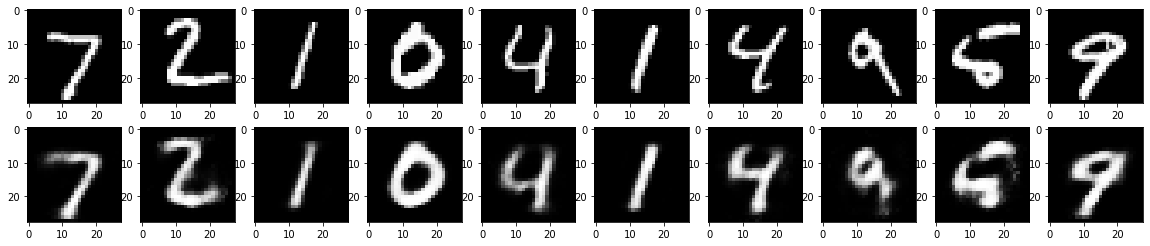

In [44]:
n =10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(img[i].reshape(28,28))
  plt.gray()


plt.show()


Used for data denoising and dimensionality reduction